# Time series Analysis 

In [86]:
from pandas import Series
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize'] = 15, 6

In [80]:
data=pd.read_csv('a40282n.csv',header=None,index_col=None)
print(data.head())
# print(data.dtypes)

                        0     1      2     3     4    5     6    7  8  9  10
0  '[10:00:00 30/06/2016]'  60.3  102.7  56.5  71.5  0.0  16.8  0.0  -  -  -
1  '[10:01:00 30/06/2016]'  64.3  101.6  55.3  70.3  0.0  21.4  0.0  -  -  -
2  '[10:02:00 30/06/2016]'  60.9  112.5  60.1  77.3  0.0  12.1  0.0  -  -  -
3  '[10:03:00 30/06/2016]'  59.8  115.1  59.7  77.8  0.0  10.6  0.0  -  -  -
4  '[10:04:00 30/06/2016]'  60.5  111.5  58.6  75.5  0.0  16.2  0.0  -  -  -


In [81]:
#extract previous 5 columns
data=data[list(range(5))]

In [82]:
# format the timestamp
rawtime=[]
timeformat=[]
for i in range(len(data)):
    rawtime.append(data[0][i][2:21])
    timeformat.append(pd.to_datetime(rawtime[i],format='%H:%M:%S %d/%m/%Y'))
data[0]=timeformat

In [83]:
#rename the columns
data.columns=['Time and date','HR','ABPSys','ABPDias','ABPMean']

In [84]:
data.head()

,Time and date,HR,ABPSys,ABPDias,ABPMean
0,2016-06-30 10:00:00,60.3,102.7,56.5,71.5
1,2016-06-30 10:01:00,64.3,101.6,55.3,70.3
2,2016-06-30 10:02:00,60.9,112.5,60.1,77.3
3,2016-06-30 10:03:00,59.8,115.1,59.7,77.8
4,2016-06-30 10:04:00,60.5,111.5,58.6,75.5


In [91]:
ts=data['ABPMean']
# ts[datetime(2016,6,20,10,0,0)]
# plt.plot(data['ABPMean'])

In [93]:
print(data['Time and date'][0])

2016-06-30 10:00:00


In [96]:
data['Time and date']=pd.to_datetime(data['Time and date'],infer_datetime_format=True)
indexedDataset=data.set_index(['Time and date'])

In [97]:
indexedDataset.head()

,HR,ABPSys,ABPDias,ABPMean
Time and date,,,,
2016-06-30 10:00:00,60.3,102.7,56.5,71.5
2016-06-30 10:01:00,64.3,101.6,55.3,70.3
2016-06-30 10:02:00,60.9,112.5,60.1,77.3
2016-06-30 10:03:00,59.8,115.1,59.7,77.8
2016-06-30 10:04:00,60.5,111.5,58.6,75.5


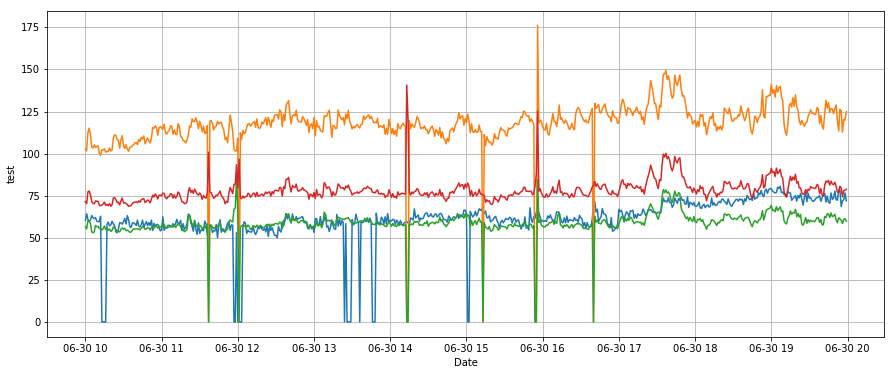

In [115]:
plt.xlabel('Date')
plt.ylabel('test')
plt.grid(True)
plt.plot(indexedDataset)


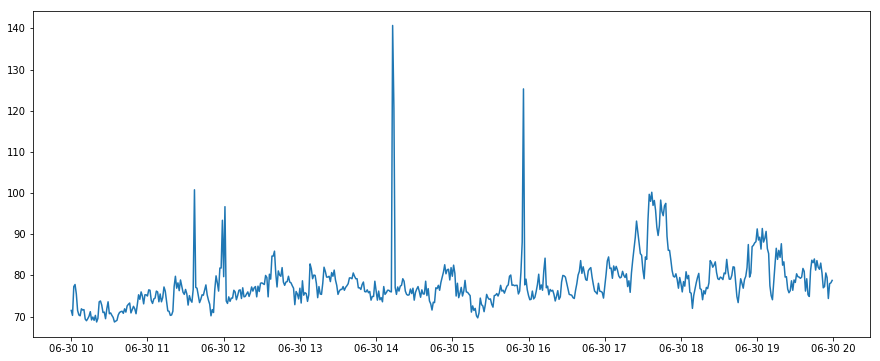

In [118]:
ABPm=indexedDataset[['ABPMean']]
plt.plot(ABPm)

In [121]:
#Determing rolling statistics
#30 minutes
rolmean=ABPm.rolling(window=30).mean()
rolstd=ABPm.rolling(window=30).std()
print(rolmean,rolstd)

                       ABPMean
Time and date                 
2016-06-30 10:00:00        NaN
2016-06-30 10:01:00        NaN
2016-06-30 10:02:00        NaN
2016-06-30 10:03:00        NaN
2016-06-30 10:04:00        NaN
2016-06-30 10:05:00        NaN
2016-06-30 10:06:00        NaN
2016-06-30 10:07:00        NaN
2016-06-30 10:08:00        NaN
2016-06-30 10:09:00        NaN
2016-06-30 10:10:00        NaN
2016-06-30 10:11:00        NaN
2016-06-30 10:12:00        NaN
2016-06-30 10:13:00        NaN
2016-06-30 10:14:00        NaN
2016-06-30 10:15:00        NaN
2016-06-30 10:16:00        NaN
2016-06-30 10:17:00        NaN
2016-06-30 10:18:00        NaN
2016-06-30 10:19:00        NaN
2016-06-30 10:20:00        NaN
2016-06-30 10:21:00        NaN
2016-06-30 10:22:00        NaN
2016-06-30 10:23:00        NaN
2016-06-30 10:24:00        NaN
2016-06-30 10:25:00        NaN
2016-06-30 10:26:00        NaN
2016-06-30 10:27:00        NaN
2016-06-30 10:28:00        NaN
2016-06-30 10:29:00  71.433333
...     

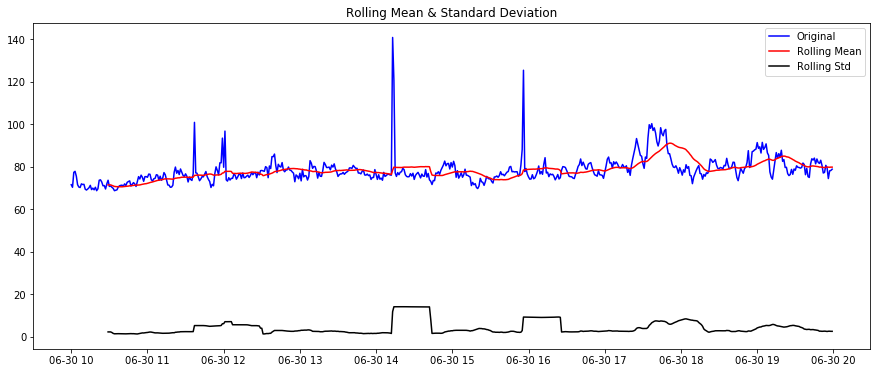

In [122]:
#plot rolling statistics
orig=plt.plot(ABPm,color='b',label='Original')
mean=plt.plot(rolmean,color='red',label='Rolling Mean')
std=plt.plot(rolstd,c='k',label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## Stationarity
the standard deviation is not constant, so our data is not stationary
只用肉眼是分不清是否真的平稳的，因此，我们有必要引入数学方法对平稳进行形式化的检验。

dickey-fuller test是用来检验序列是否平稳的方式，可以测试一个自回归模型是否存在单位根（unit root）
单位根检验是指检验序列中是否存在单位根，因为存在单位根就是非平稳时间序列了。
单位根就是指单位根过程，可以证明，序列中存在单位根过程就不平稳，会使回归分析中存在伪回归。

而迪基-福勒检验（Dickey-Fuller test）和扩展迪基-福勒检验（Augmented Dickey-Fuller test可以测试一个自回归模型是否存在单位根（unit root）。
http://www.pengfoo.com/post/machine-learning/2017-01-24

In [125]:
#Perform Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest=adfuller(ABPm['ABPMean'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for k,v in dftest[4].items():
    dfoutput['Critical Value (%s)'%k]=v
    
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -4.962266
p-value                          0.000026
#Lags Used                       6.000000
Number of Observations Used    593.000000
Critical Value (1%)             -3.441426
Critical Value (5%)             -2.866426
Critical Value (10%)            -2.569372
dtype: float64


## Note
p-value should be always small, here is close to 0, it's good

Critical Value should be always more than Test Statistic, it's good shows that it can reject the hypothesis and we can say the data is stationary 

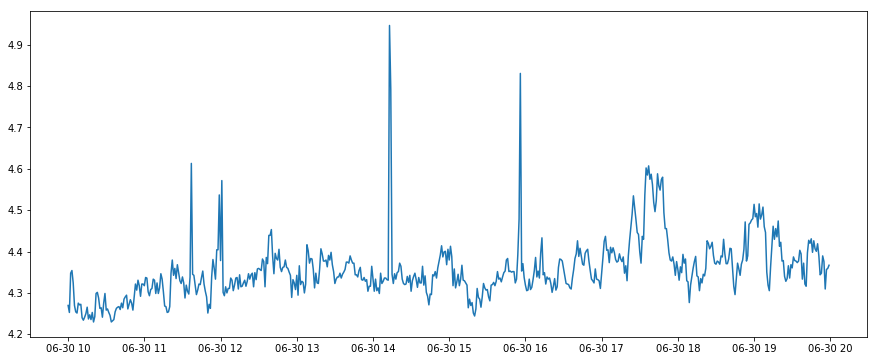

In [126]:
#Estimating trend
ABPm_logScale=np.log(ABPm)
plt.plot(ABPm_logScale)

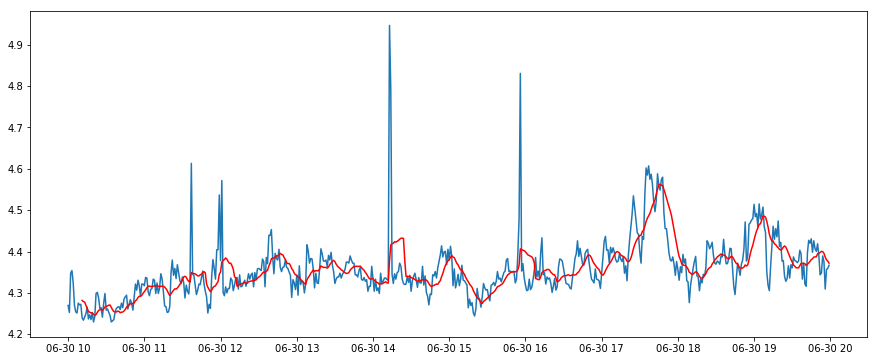

In [127]:
movingAverage=ABPm_logScale.rolling(window=12).mean()
movingSTD=ABPm_logScale.rolling(window=12).mean()
plt.plot(ABPm_logScale)
plt.plot(movingAverage,c='red')

## Note
### some standard ways to make a time series stationary
make it stationary like take log, take a square, cube roots all depends on data what it holds so here we're going to log scale 

In [130]:
datasetLogScaleMinusMovingAverage=ABPm_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,ABPMean
Time and date,
2016-06-30 10:11:00,-0.041982
2016-06-30 10:12:00,-0.044796
2016-06-30 10:13:00,-0.036622
2016-06-30 10:14:00,-0.019879
2016-06-30 10:15:00,0.003079
2016-06-30 10:16:00,-0.018152
2016-06-30 10:17:00,-0.006202
2016-06-30 10:18:00,-0.016159
2016-06-30 10:19:00,0.000939


In [134]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    #plot rolling statistics
    orig=plt.plot(timeseries,color='b',label='Original')
    mean=plt.plot(movingAverage,c='red',label='Rolling Mean')
    std=plt.plot(movingSTD,c='k',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
    dftest=adfuller(timeseries['ABPMean'],autolag='AIC')

    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for k,v in dftest[4].items():
        dfoutput['Critical Value (%s)'%k]=v

    print(dfoutput)

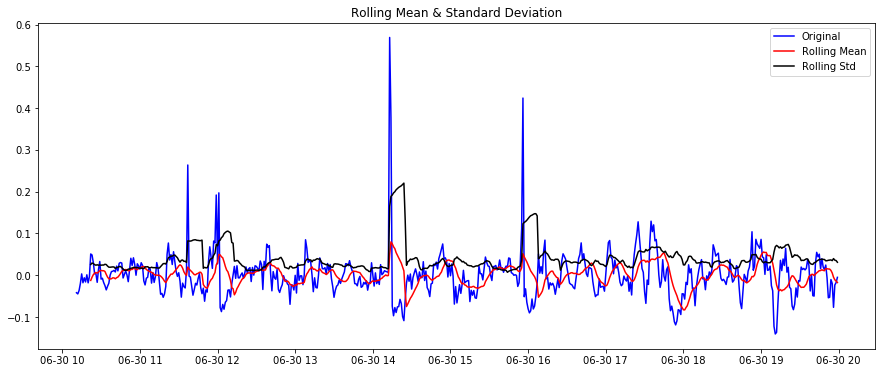

Results of Dickey-Fuller Test:
Test Statistic                -1.317320e+01
p-value                        1.238328e-24
#Lags Used                     0.000000e+00
Number of Observations Used    5.880000e+02
Critical Value (1%)           -3.441520e+00
Critical Value (5%)           -2.866468e+00
Critical Value (10%)          -2.569394e+00
dtype: float64


In [135]:
test_stationarity(datasetLogScaleMinusMovingAverage)

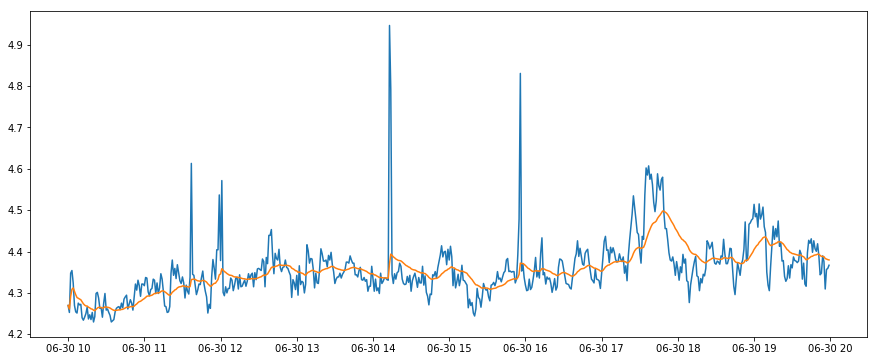

In [136]:
#weighted mean
exponentialDecayWeightedAverage=ABPm_logScale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(ABPm_logScale)
plt.plot(exponentialDecayWeightedAverage)

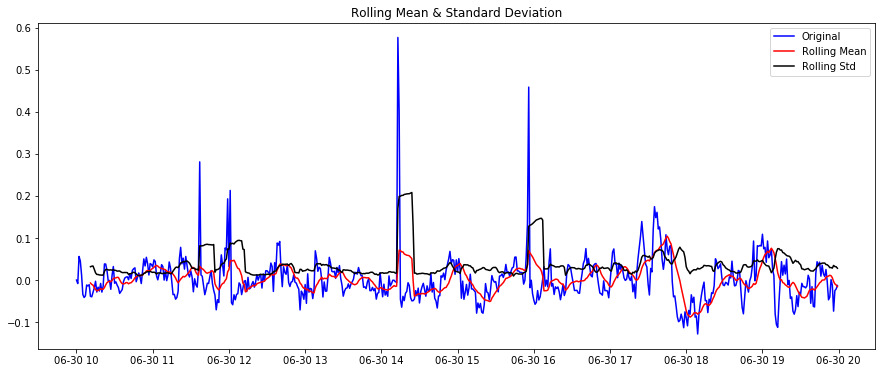

Results of Dickey-Fuller Test:
Test Statistic                -1.266196e+01
p-value                        1.299104e-23
#Lags Used                     0.000000e+00
Number of Observations Used    5.990000e+02
Critical Value (1%)           -3.441314e+00
Critical Value (5%)           -2.866377e+00
Critical Value (10%)          -2.569346e+00
dtype: float64


In [137]:
#substract weighted mean instead of simple mean
#and then check for stationarity
datasetLogScaleMinusMovingExponentialDecayAverage=ABPm_logScale-exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

## Note
the std is quite flat and in fact you can also say that this doesn't have any trend

use the function called a shift to shift all of these values
below we take a lag滞后 of 1 so here we just shift the values by 1

### ARIMA model
ARIMA model have three models in it:
* AR model: stand for auto regressive
* MA model: for moving average
* IS model: for integration

so Arima model basically takes three parameters

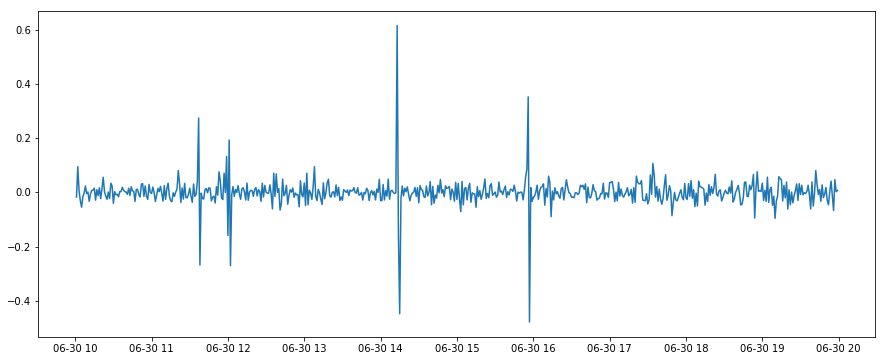

In [138]:
#shift the value into series so that we can use it in the forecasting
datasetLogDiffShifting=ABPm_logScale-ABPm_logScale.shift()
plt.plot(datasetLogDiffShifting)

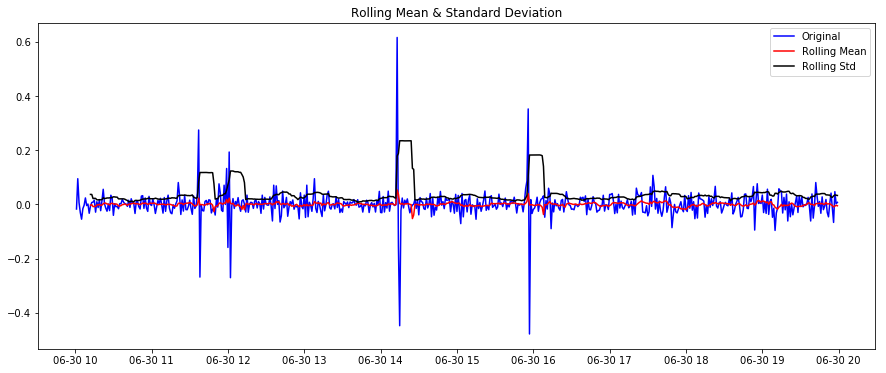

Results of Dickey-Fuller Test:
Test Statistic                -1.143874e+01
p-value                        6.254018e-21
#Lags Used                     9.000000e+00
Number of Observations Used    5.890000e+02
Critical Value (1%)           -3.441501e+00
Critical Value (5%)           -2.866460e+00
Critical Value (10%)          -2.569390e+00
dtype: float64


In [139]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

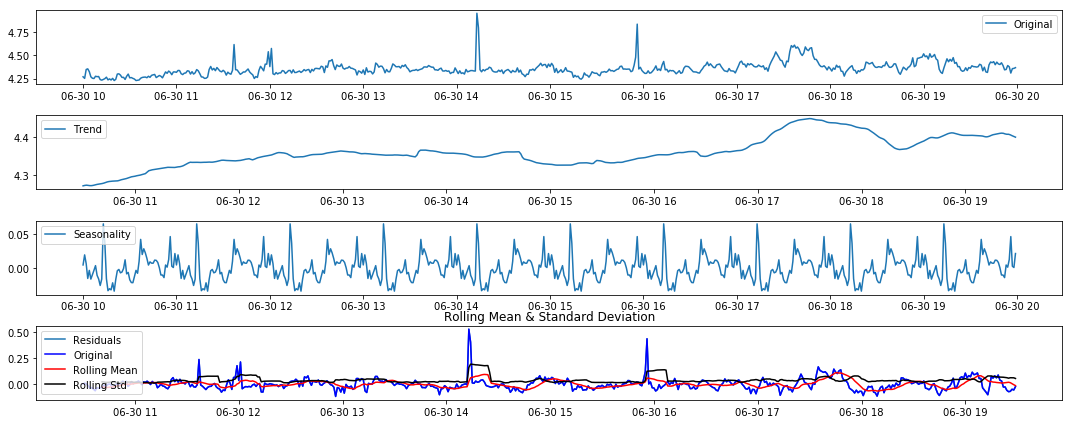

Results of Dickey-Fuller Test:
Test Statistic                -1.164580e+01
p-value                        2.093817e-21
#Lags Used                     0.000000e+00
Number of Observations Used    5.390000e+02
Critical Value (1%)           -3.442541e+00
Critical Value (5%)           -2.866917e+00
Critical Value (10%)          -2.569634e+00
dtype: float64


In [148]:
from statsmodels.tsa.seasonal import seasonal_decompose
# sm.tsa.seasonal_decompose(ABPm_logScale.G.values, freq=1440)
#freq is calculated based on the time window, which is 10 mins, 
#so the freqency actually is half a day. freq=6*12 
#frep=6*10 ten hours???
decomposition = seasonal_decompose(ABPm_logScale,freq=60)
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(ABPm_logScale,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

## Note
residuals is nothing, the irregularities that is present in your data

so they don't have any shape any size and it cannot find out what is going to happen next
it's quite regular in nature

so now we are going to check the noise if it's stationary or not

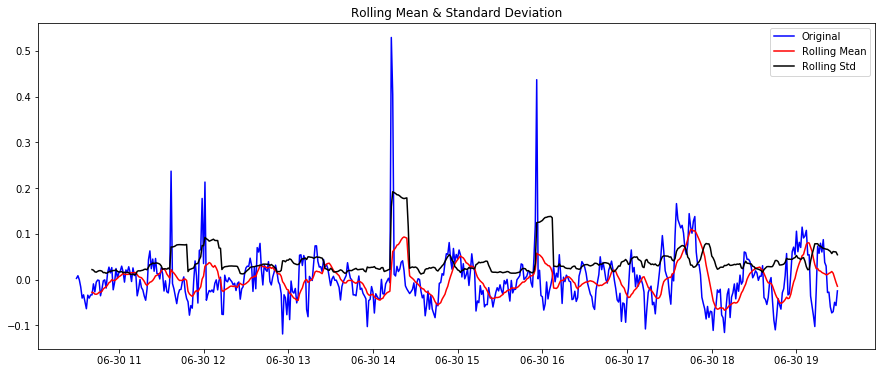

Results of Dickey-Fuller Test:
Test Statistic                -1.164580e+01
p-value                        2.093817e-21
#Lags Used                     0.000000e+00
Number of Observations Used    5.390000e+02
Critical Value (1%)           -3.442541e+00
Critical Value (5%)           -2.866917e+00
Critical Value (10%)          -2.569634e+00
dtype: float64


In [149]:
decomposeLogData=residual
decomposeLogData.dropna(inplace=True)
test_stationarity(decomposeLogData)

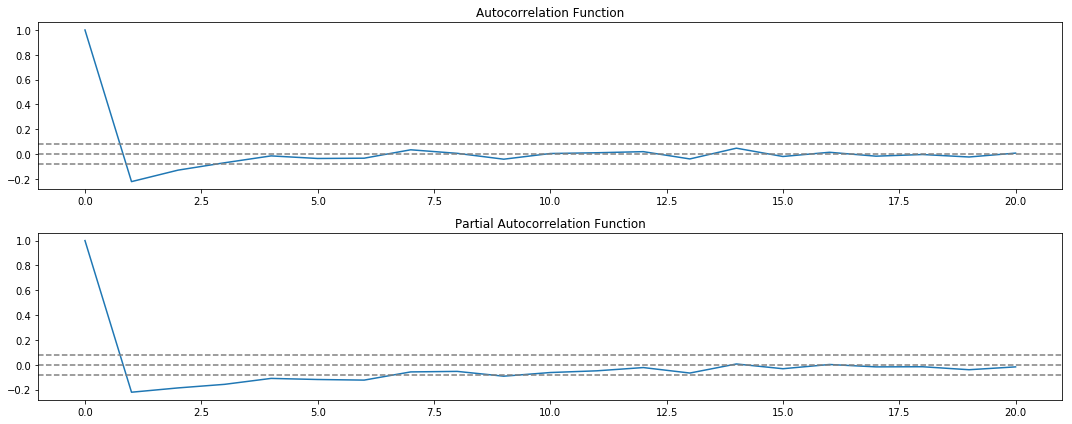

In [150]:
#determine how to calculate p-value and Q-value(left graph) using acf 
#according to the graph we need to check that what is the value where the graph cuts off 
#or you can set drops to zero for the first time 

'''
it touches the confidence level over here so here if you see the p-values (right graph) 
almost around 1 or 2（下降最陡的那个点）
左边那个图用来计算Q value，从左边看，it cut 在和第一条线的第一个交点，
drops to zero在跟0相交的那个点，然后Q value是第三条线的交点，也在1附近

'''

#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(datasetLogDiffShifting,nlags=20)
lag_pacf=pacf(datasetLogDiffShifting,nlags=20,method='ols')

#Plot ACF
plt.subplot(211)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',c='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',c='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',c='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(212)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',c='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',c='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',c='gray')
plt.title('Partial Autocorrelation Function')

plt.tight_layout()

## Note
we can simply substitute these values in the ARIMA model 

with respect to AR that is your auto regressive part

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


Plotting AR model


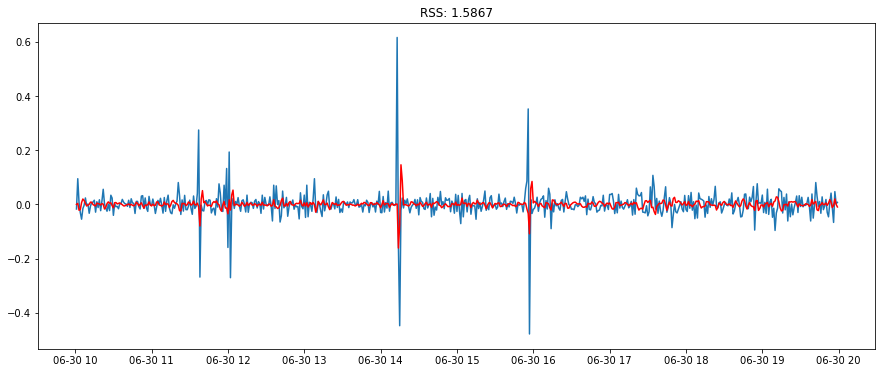

In [188]:
from statsmodels.tsa.arima_model import ARIMA
# AR Model
#(2,1,2)means P value is 2, differenced it 1, so D value becomes 1, Q value is again 2
#(1,1,0)(0,1,1)
model= ARIMA(ABPm_logScale,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues,color='red')
#RSS is the residual sum of squares
# the greater the RSS the bad is for you
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting['ABPMean'])**2))
print('Plotting AR model')

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


Plotting MA model


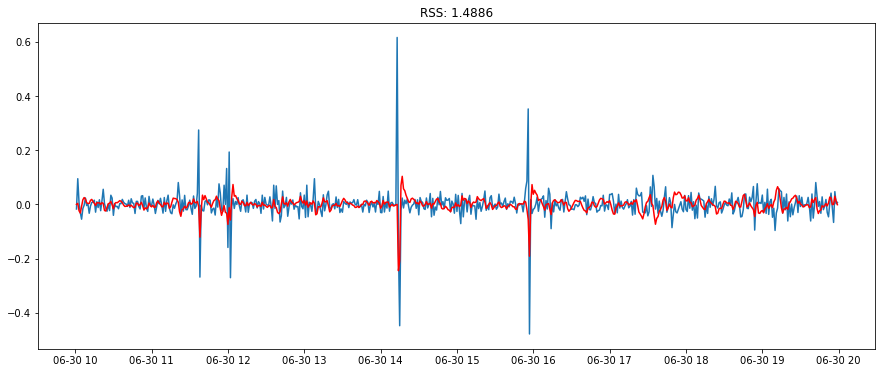

In [187]:
#MA model
model=ARIMA(ABPm_logScale,order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-datasetLogDiffShifting['ABPMean'])**2))
print('Plotting MA model')

## Note
here we conclude that with respect to auto regressive part, we have the RSS as 1.5867
with respect to moving average we have the RSS 1.4886 and if we combine both of them and make a ARIMA out of it that is (2,1,2)

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


Plotting ARIMA model


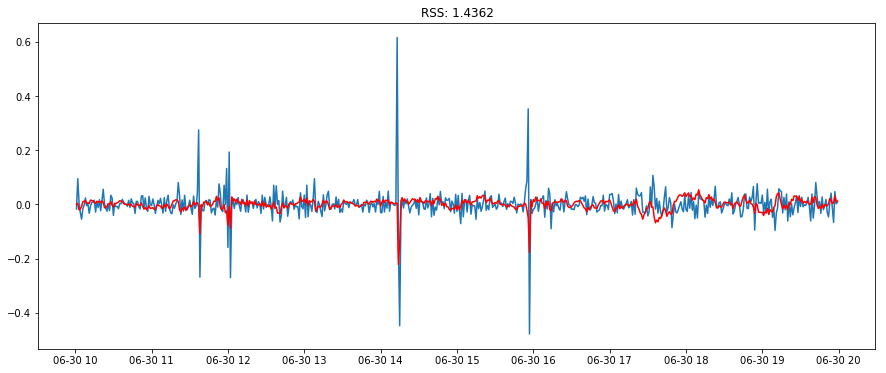

In [189]:
model=ARIMA(ABPm_logScale,order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['ABPMean'])**2))
print('Plotting ARIMA model')

In [190]:
#do some fitting on the time series on what data we have
predictions_ARIMA_diff=pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Time and date
2016-06-30 10:01:00    0.000193
2016-06-30 10:02:00    0.003794
2016-06-30 10:03:00   -0.020167
2016-06-30 10:04:00   -0.016795
2016-06-30 10:05:00   -0.007855
dtype: float64


In [191]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum=predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Time and date
2016-06-30 10:01:00    0.000193
2016-06-30 10:02:00    0.003987
2016-06-30 10:03:00   -0.016180
2016-06-30 10:04:00   -0.032975
2016-06-30 10:05:00   -0.040829
dtype: float64


In [201]:
# finally we are going to have the predictions done for the fitted values
predictions_ARIMA_log=pd.Series(ABPm_logScale['ABPMean'].iloc[0],index=ABPm_logScale.index)
predictions_ARIMA_log=predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Time and date
2016-06-30 10:00:00    4.269697
2016-06-30 10:01:00    4.269890
2016-06-30 10:02:00    4.273684
2016-06-30 10:03:00    4.253517
2016-06-30 10:04:00    4.236723
dtype: float64

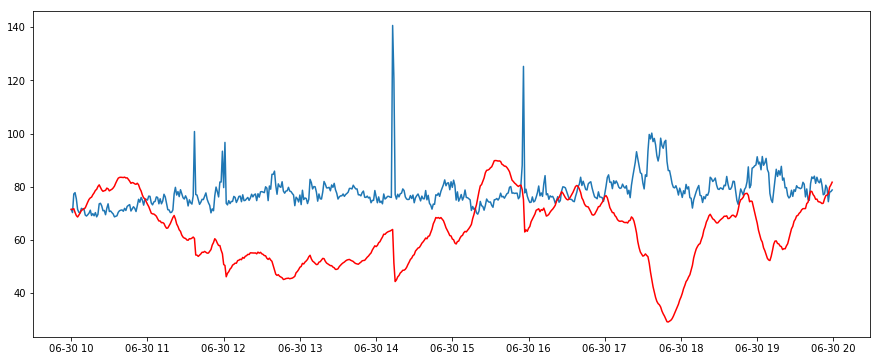

In [202]:
#come back to the original form
# plot the actual values to how our model has fited
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(ABPm)
plt.plot(predictions_ARIMA,c='r')

In [203]:
ABPm_logScale

,ABPMean
Time and date,
2016-06-30 10:00:00,4.269697
2016-06-30 10:01:00,4.252772
2016-06-30 10:02:00,4.347694
2016-06-30 10:03:00,4.354141
2016-06-30 10:04:00,4.324133
2016-06-30 10:05:00,4.269697
2016-06-30 10:06:00,4.254193
2016-06-30 10:07:00,4.251348
2016-06-30 10:08:00,4.275276


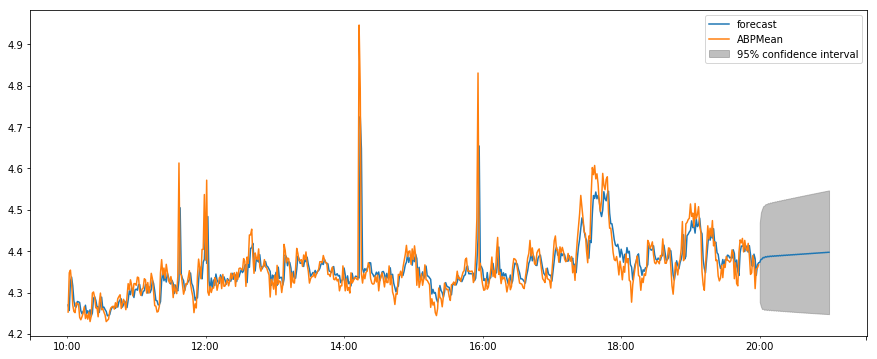

In [210]:
#to predict next 60 points
results_ARIMA.plot_predict(1,660)

## Note
the blue is the forecasted value and this gray part is the confidence level so now whatever happens or however you do the foreasting this value will not exceed the confidence level so it means for the next 1 hour you have the prediction somewhat like this

In [211]:
x=results_ARIMA.forecast(steps=60)

In [206]:
x[1]

array([0.04893829, 0.0579196 , 0.06169574, 0.06335123, 0.06434122,
       0.06488896, 0.06533437, 0.06563456, 0.06593559, 0.06616533,
       0.06641941, 0.06662624, 0.06686254, 0.06706145, 0.06728976,
       0.06748583, 0.06770965, 0.06790462, 0.06812528, 0.06831974,
       0.06853778, 0.06873188, 0.06894759, 0.06914136, 0.06935489,
       0.0695483 , 0.06975978, 0.06995279, 0.07016232, 0.07035489,
       0.07056256, 0.07075466, 0.07096054, 0.07115213, 0.07135631,
       0.07154735, 0.0717499 , 0.07194037, 0.07214134, 0.07233122,
       0.07253068, 0.07271994, 0.07291795, 0.07310657, 0.07330318,
       0.07349115, 0.0736864 , 0.0738737 , 0.07406764, 0.07425426,
       0.07444694, 0.07463287, 0.07482432, 0.07500956, 0.07519982,
       0.07538435, 0.07557345, 0.07575727, 0.07594525, 0.07612836])

In [207]:
len(x[1])

60

In [208]:
np.exp(x[1])

array([1.05015555, 1.0596298 , 1.06363867, 1.06540098, 1.06645623,
       1.06704054, 1.06751591, 1.06783641, 1.06815792, 1.06840335,
       1.06867484, 1.06889589, 1.0691485 , 1.06936119, 1.06960536,
       1.0698151 , 1.07005457, 1.07026323, 1.07049941, 1.0707076 ,
       1.07094109, 1.07114898, 1.07138006, 1.07158767, 1.07181652,
       1.07202384, 1.07225057, 1.07245755, 1.07268228, 1.07288887,
       1.0731117 , 1.07331786, 1.07353886, 1.07374456, 1.07396382,
       1.07416901, 1.0743866 , 1.07459126, 1.07480725, 1.07501135,
       1.0752258 , 1.07542931, 1.07564228, 1.07584518, 1.07605672,
       1.07625901, 1.07646917, 1.07667081, 1.07687965, 1.07708063,
       1.07728818, 1.0774885 , 1.07769481, 1.07789445, 1.07809955,
       1.07829851, 1.07850244, 1.07870071, 1.07890351, 1.07910108])